In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt


In [3]:
file_path = 'Figure_4_data.csv'  # The file is now relative to the new working directory
assert os.path.exists(file_path), f"File not found: {file_path}"


In [4]:

# 1) Load the full dataset
df_full = pd.read_csv(file_path)

# 2) Compute log10 transformations
df_full['Log10_Plasmid_Length'] = np.log10(df_full['Plasmid_Length'])
df_full['Log10_PCN'] = np.log10(df_full['Predicted_PCN_backtransformed'])


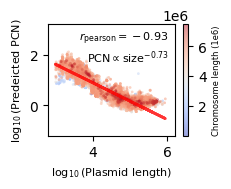

In [ ]:

# 3) Extract arrays for plotting
x = df_full['Log10_Plasmid_Length'].values
y = df_full['Log10_PCN'].values
c = df_full['Total_Chromosome_Length'].values  # raw chromosome length

# 3a) Filter to only include plasmid lengths (log10) between 3 and 6
mask = (x >= 3) & (x <= 6)
x_f = x[mask]
y_f = y[mask]
c_f = c[mask]

# 4) Calculate Pearson's r and Spearman's rho on the filtered data
r_value, _   = pearsonr(x_f, y_f)
rho_value, _ = spearmanr(x_f, y_f)

# 5) Fit a regression line to the filtered data
slope, intercept = np.polyfit(x_f, y_f, 1)

# 6) Prepare annotation text
annotation_text = (
    rf"$r_{{pearson}}={r_value:.3f},\ \rho_{{spearman}}={rho_value:.3f}$" "\n"
    rf"$\mathrm{{PCN}} \propto \mathrm{{size}}^{{{slope:.2f}}}$"
)

# 7) Sort the filtered points by chromosome length for proper layering
idx = np.argsort(c_f)
x_s, y_s, c_s = x_f[idx], y_f[idx], c_f[idx]

# 8) Create the plot
plt.figure(figsize=(2.5, 2))
sc = plt.scatter(
    x_s, y_s,
    c=c_s,
    s=4,
    cmap='coolwarm',
    edgecolors='none',
    alpha=0.5
)
# regression line
plt.plot(x_s, slope * x_s + intercept, color='red', linewidth=2, alpha=0.8)

# labels
plt.xlabel(r'$\log_{10}$(Plasmid length)', fontsize=8)
plt.ylabel(r'$\log_{10}$(Predeicted PCN)', fontsize=8)

# colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Chromosome length (1e6)', fontsize=6)

# 6) Prepare annotation text (matching previous style)
annotation_text = (
    rf"$r_{{\mathrm{{pearson}}}} = {r_value:.2f}$" + "\n" +
    rf"$\mathrm{{PCN}} \propto \mathrm{{size}}^{{{slope:.2f}}}$"
)
# annotation (add this block to display it!)
plt.text(
    0.95, 0.95, annotation_text,
    transform=plt.gca().transAxes,
    fontsize=8,
    verticalalignment='top',
    horizontalalignment='right'
)
# axis limits, ticks, styling
plt.xlim(2.8, 6.2)
plt.ylim(-1.2, 3.2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.tight_layout()

# 9) Save back to the same directory
output_dir = os.path.dirname(file_path)
for ext in ['svg', 'pdf', 'tiff']:
    out_path = os.path.join(output_dir, f'S4_B.{ext}')
    plt.savefig(out_path, dpi=1200, bbox_inches='tight', facecolor='white')

plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde  



In [2]:

# Verify if the file exists
file_path = 'Figure_4_data.csv'  # The file is now relative to the new working directory
assert os.path.exists(file_path), f"File not found: {file_path}"


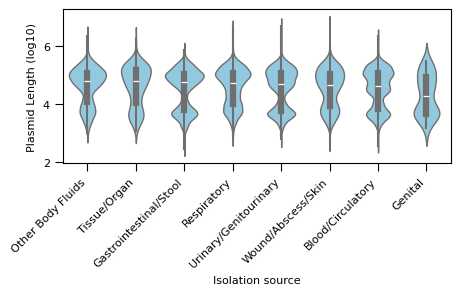

In [ ]:

# Load the data
plot_df = pd.read_csv(file_path)

# Apply log10 transformation to the 'Plasmid_Length' column (not Predicted_PCN_backtransformed)
plot_df['Log10_Plasmid_Length'] = np.log10(plot_df['Plasmid_Length'])

# Filter groups with more than 3 data points
group_counts = plot_df.groupby('Group')['Plasmid_Length'].count()
valid_groups = group_counts[group_counts > 3].index
filtered_df = plot_df[plot_df['Group'].isin(valid_groups)]
# Remove 'Miscellaneous/Unspecified Clinical' group
filtered_df = filtered_df[filtered_df['Group'] != 'Miscellaneous/Unspecified Clinical']
# Calculate median plasmid length per group (in log10 space for correct sorting)
group_medians = filtered_df.groupby('Group')['Log10_Plasmid_Length'].median()
sorted_groups = group_medians.sort_values(ascending=False).index

# Plot
plt.figure(figsize=(5, 2))
sns.violinplot(
    x='Group',
    y='Log10_Plasmid_Length',
    data=filtered_df,
    order=sorted_groups,
    inner="box",
    linewidth=1,
    color='skyblue'
)

# Axis labels
plt.xlabel('Isolation source', fontsize=8)
plt.ylabel('Plasmid Length (log10)', fontsize=8)

# X and Y axis ticks
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tick_params(axis='x', which='both', length=6)
plt.tick_params(axis='y', which='both', length=6)

# No grid
plt.grid(False)

# Save in multiple formats (adjust name if needed)
plt.savefig('S4_C.pdf', bbox_inches='tight', dpi=1200)


# Show plot
plt.show()
